### IDs:
Insert yours IDs to the cell below

ID #1: 203958103

ID #2: 311170575


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

In [113]:
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.optimize import fsolve
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
sns.set(style="white", palette="muted", color_codes=True)

### Question 1 - Data exploration and visialization - practical

Load Boston dataset from sklearn.
Explore the data. follow th instructions below and make sure to support your answers with proper outputs and plots.
When plotting, pay close attention to the range of the axis, and include axis labels and a title for the figure.

1. Describe the dataset. How many samples does it contain? How many features? What isis the data type for each variable?
2. Produce a histogram and a boxplot of the nitric oxides concentration. describe the distribution.
3. Produce a correlation matrix of all the features. Are there any correlated features? Can you identify one feature with unusual behaviour?
4. Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot). 
5. Produce a cumulative histogram of the age variable and add two horizontal lines on the first and third quartile (on the cumulative count)
6. Identify and report 2 “interesting” trends in the data. No need to provide statistical confidence at this point. 

In [114]:
from sklearn.datasets import load_boston

In [115]:
boston = load_boston()

In [116]:
df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
df['target'] = boston.target

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [118]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### This dataset has a total of 506 entries, arranged in 14 columns.
### All the data is float64 numbers.

In [119]:
nox = df['NOX']
x = [i for i in range(506)]

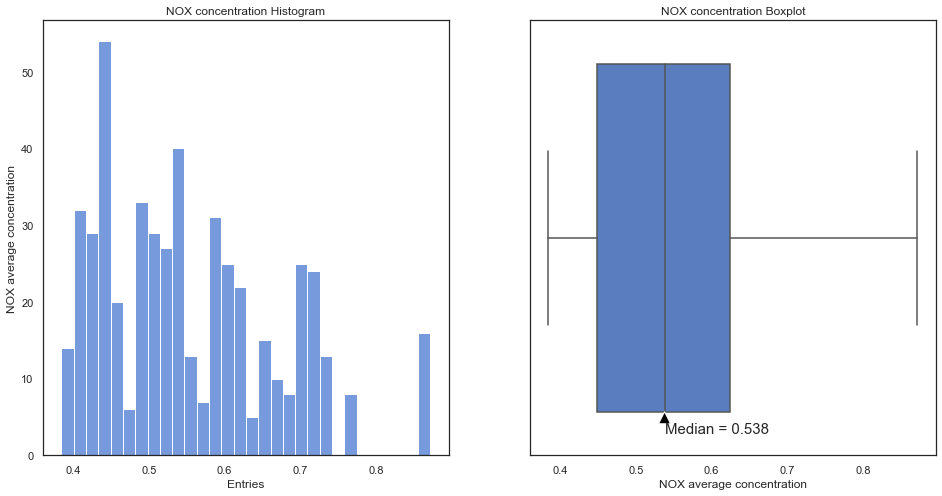

In [120]:
fig, axes = plt.subplots(1,2,figsize=(16,8))


plt.subplot(121)
sns.histplot(x=nox, bins=30)
plt.title('NOX concentration Histogram')
plt.xlabel('Entries')
plt.ylabel('NOX average concentration')

plt.subplot(122)
sns.boxplot(x=nox)
plt.title('NOX concentration Boxplot')
plt.xlabel('NOX average concentration')
med = nox.median()
plt.annotate(f'Median = {med}',xy=(med,0.4),xytext=(med,0.45),arrowprops=dict(facecolor='black'),size=15)
plt.show();

### From the graphs above, we can see that the median is 0.538 

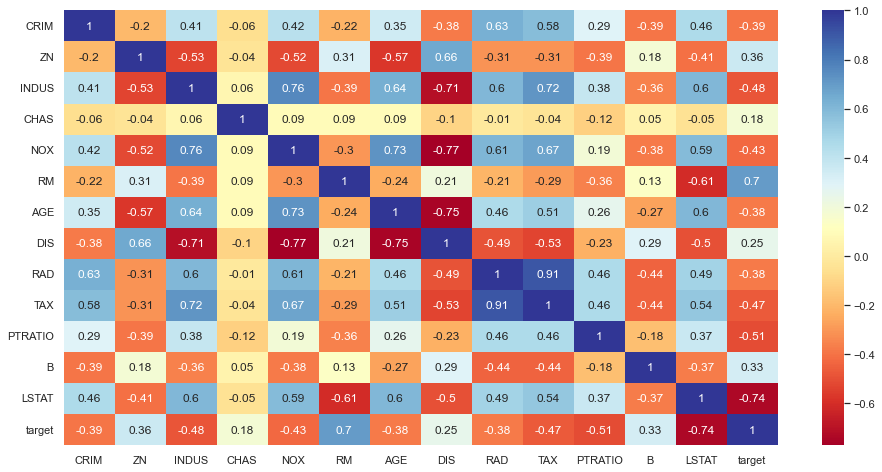

In [121]:
fig, ax = plt.subplots(figsize=(16,8))

plt.subplot(111)
sns.heatmap(df.corr().round(2), cmap='RdYlBu',annot=True);

### We can infer from the table a few thing:
### 1. Bounding the Charles river (CHAS feature) have ~0 correlation with the other features.
### 2. The proportion in industrial bussinesses (INDUS) have high correlation with nitric oxides concentration (NOX) and TAX this is not surprising.
### 3. Distance to employment centres (DIS) is correlated to many other features. positive: ZN. negative: INDUS,  NOX, AGE, RAD, TAX, LSTAT. All this is also predictable as DIS probably reflects suburban settlements, with relatively old and rich population. 
### 4. The two highest correlated pairs:
#### a) NOX and DIS with correlation of -0.77
#### b) TAX and RAD with correlation of 0.91

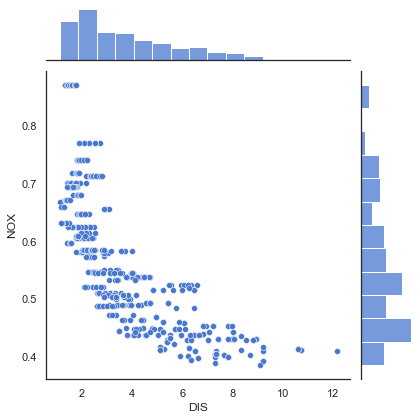

In [122]:
sns.jointplot(data=df,x='DIS',y='NOX')
plt.xlabel('DIS')
plt.ylabel('NOX');

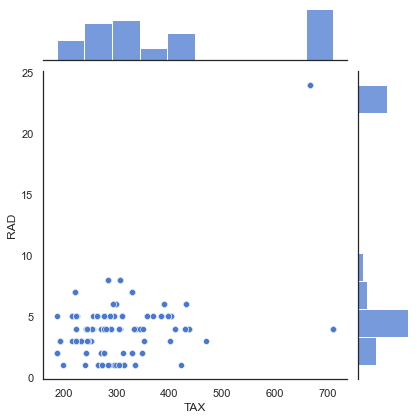

In [123]:
sns.jointplot(data=df,x='TAX',y='RAD')
plt.xlabel('TAX')
plt.ylabel('RAD');

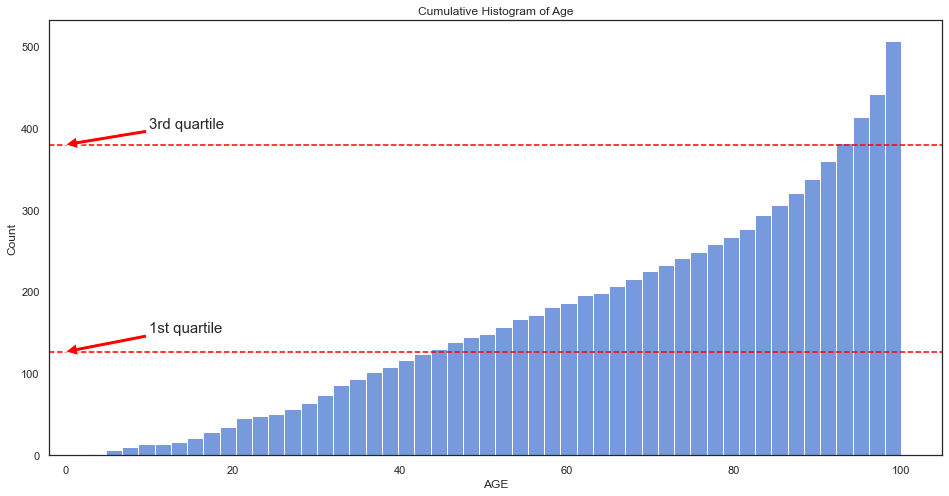

In [124]:
plt.figure(figsize=(16,8))
plt.subplot(111)
sns.histplot(cumulative=True,data=df,x='AGE',bins=50)
first_qtr = df['AGE'].count()/4
third_qtr = df['AGE'].count()/4*3

plt.axhline(first_qtr,c='red',ls='--')
plt.axhline(third_qtr,c='red',ls='--')
plt.title('Cumulative Histogram of Age')
plt.annotate('1st quartile',xy=(0,first_qtr),xytext=(10,150),arrowprops=dict(facecolor='red'),size=15)
plt.annotate('3rd quartile',xy=(0,third_qtr),xytext=(10,400),arrowprops=dict(facecolor='red'),size=15);

### Question 2 - Independence and conditional independence

#### 2.A
Let $\ X, Y \ $ and $Z$  be discrete random variables with $\ n, m \ $ and $k=4$ possible outcomes respectivley.

How many parameters define the joint distribution of $\ X, Y \ $ and $Z$?

### Answer:
The joint probabilty mass function for discrete random variables $X,Y,Z$ is:
$ p_{X,Y,Z}(x,y,z)=P(X=x$ and $Y=y$ and $Z=z)$
$\newline$ in this case: $ \sum_{i=1}^{n} \sum_{j=1}^{m} \sum_{r=1}^{k} P(X=x_i$ and $Y=y_j$ and $Z=z_k)=1$ 
$\newline$ in this case we know $k$, and the last parameter is complementary to 1 so we need: $n*m*k-1=4nm-1$ parameters to define the distribution.

#### 2.B
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that they are independent?

### Answer:
$ p_{X,Y,Z}(x,y,z)=P(X=x$ and $Y=y$ and $Z=z)$
$\newline p_{X,Y,Z}(x,y,z)=P(X=x)\cdot P(Y=y)\cdot P(Z=z) \newline$
$X$ has $n$ options, $Y$ has $m$ options, $Z$ has 4 options.
Total parameters needed are $(n-1)+(m-1)+(k-1)=n+m+4-3=n+m+1$

#### 2.C
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that $X$ and $Y$ are conditionaly independent given $Z$?

### Answer:
$ \sum_{k_1}^{k_4}\sum_{i=1}^{n}\sum_{j=1}^{m}P(X_i,Y_j|Z_{k})$

$P(x, y, z) = P(z) \times P(x \mid z) \times P(y \mid z)$

$\newline \text{the number of parameters is: } k\cdot ((n-1)+(m-1))+(k-1)=4(n+m-2)+3
\newline =4n+4m-5$

#### 2.D
Give an example for a joint distribution of $\ U, V \ $ and $W$ where $U$ and $V$ are NOT conditionally independent given $W$, but $U$ and $V$ are (unconditionally) independent. Also: $U$ and $V$ are standard normally distributed ($N(0, 1)$) and $W$ is a coin (2 possible values).

### Answer:
Let $U$ define the probability for the height of a person, where $\mu$ is defined as $0$ and the height of the person is either above the mean or below the mean.
Let $V$ define the probability for the weight of a person, where $\mu$ is defined as $0$ and the height of the person is either above the mean or below the mean.
The joint distribution $(U,V)$ decribes the probability of a person with height $U$ and weight $V$. If $W$ is 'Heads' we sample first from $U$, and if $W$ is 'Tails' we sample first from $V$.

$P(U,V,W) = P(U,V|W)\cdot P(W)$ by definition.

$P(W=w)=p$

$P(U,V,W)=p(p\cdot P(U)P(V|U)+(1-p)\cdot P(V)P(U|V))$

U,V are independant, so: $P(U)P(V|U)=P(V)P(U|V)=P(V)\cdot P(U)$

hence:
$P(U,V,W)=pP(U)P(V)$

### Question 3 - Gaussian mixtures – parameter estimation and generation 

Consider the data provided in GMD.csv
Assume that the data comes from a Gaussian mixture distribution (GMD) with $k=3$. Furthermore, assume that $\mu_{1}=4, \mu_{2}=9, \sigma_{1}=\sigma_{2}=0.5, \sigma_3=1.5$ and $w_2=0.25$.

Read the data and answer the following questions.

In [125]:
gmd = pd.read_csv('GMD.csv',header=None, names=['sample','X'])

gmd.head()

,sample,X
0,0,3.575253
1,1,4.105491
2,2,3.903642
3,3,4.472249
4,4,4.297265


#### 3.A
Provide an estimate for the other parameters of the distribution in two different ways.

### First way: Solving the equations (using calculations in next cells)

There are 3 missing parameters: $w_1, w_3, \mu_3.$
We have 3 equations:
1. $w_1+w_2+w_3=1$
2. $E(X)=\sum_{i=1}^k w_iE(X_i)=w_1E(X_1)+w_2E(X_2)+w_3E(X_3)$
3. $Var(X)=\sum_{i=1}^k w_iE((X_i-\mu_i)^2)+\sum_{i=1}^k w_i(\mu_i-\mu)^2$

In [126]:
# E(X) and Var(X) values:
e_gmd = gmd['X'].mean()
var_gmd = gmd['X'].var()

def equations(p):
    x, y, z = p
    return(x + y - 0.75,
           e_gmd - x*4 - 0.25*9 - y*z,
           var_gmd - (x*0.5**2 + 0.25*0.5**2 + y*1.5**2) - (x*(4-e_gmd)**2 + 0.25*(9-e_gmd)**2 + y*(z-e_gmd)**2))

w1, w3, mu3 = fsolve(equations, (1,1,1))

print(f"The 3 missing parameters are:\nw1 = {w1:.2f}\nw3 = {w3:.2f}\nmu3 = {mu3:.2f}\n")
           


The 3 missing parameters are:
w1 = 0.12
w3 = 0.63
mu3 = 15.09



### Second way: Modified EM

In [127]:
def calc_responsibilities(k, series, weights, means, sigmas):
    
    result = np.empty((series.size, k))
    
    for i in range(k):
        result[:,i] = weights[i] * stats.norm.pdf(series, loc=means[i], scale=sigmas[i])
    
    result /= result.sum(axis=1, keepdims=True)
    
    return result

def update_param(k, series, respons, weights, means, general=False):
    
    if general:# general case
        new_w = respons.sum(axis=0) / series.size
        new_m = (respons * series).sum(axis=0) / (new_w * series.size)
        new_s = np.empty((k,1))
        for i in range(k):
            diff = series - new_m[i]
            new_s[i] = np.sqrt((respons[i] * diff**2).sum(axis=0) / (new_w * series.size))

        return new_w, new_m, new_s

    if not general:# our case
        weights[0] = respons[:,0].sum() / series.size
        weights[2] = 1 - weights[0] - weights[1]
        means[2] = (respons[:,2] * series).sum() / (weights[2] * series.size)
        
        return weights, means

def log_likelihood(series, weights, means, sigmas, k):
    
    log_likelihood = 0
    
    for j in range(k):
        log_likelihood += weights[j] * stats.norm.pdf(series, loc=means[j], scale=sigmas[j]).sum()

    return log_likelihood
    
def em(k, series, weights, means, sigmas, max_iter=100, tol=0.05, general=False):
    
    likelihood = log_likelihood(series, weights, means, sigmas, k)
    LL_diff = 1
    itr = 0
    while LL_diff > tol and itr < max_iter:
        
        responsibilities = calc_responsibilities(k, series, weights, means, sigmas)
        
        if general:
            weights, means, sigmas = update_param(k, series, responsibilities, weights, means, general)
        else:
            weights, means = update_param(k, series, responsibilities, weights, means, general)
        
        itr += 1
        
        new_liklihood = log_likelihood(series, weights, means, sigmas, k)
        
        LL_diff = abs(likelihood - new_liklihood)
        
        likelihood = new_liklihood
        
    theta = {'k':k, 'weights':weights, 'means':means, 'sigmas':sigmas,'logL':likelihood}
        
    return theta, itr
        
        

In [128]:
X = gmd['X']
init_weights = [0.1, 0.25, 0.65]
init_means = [4, 9, 12]
init_sigmas = [0.5, 0.5, 1.5]
k = 3

parameters, itr = em(k, X, init_weights, init_means, init_sigmas, tol=0.000001, max_iter=1000)

print(parameters)
print(f'iterations: {itr}')

{'k': 3, 'weights': [0.1249999999594836, 0.25, 0.6250000000405164], 'means': [4, 9, 15.105420912598774], 'sigmas': [0.5, 0.5, 1.5], 'logL': 94.25069051917322}
iterations: 6


#### 3.B
Plot a graph of the pdf of the distribution you inferred. Select adequate limits for the axes for this plot and explain your decision.

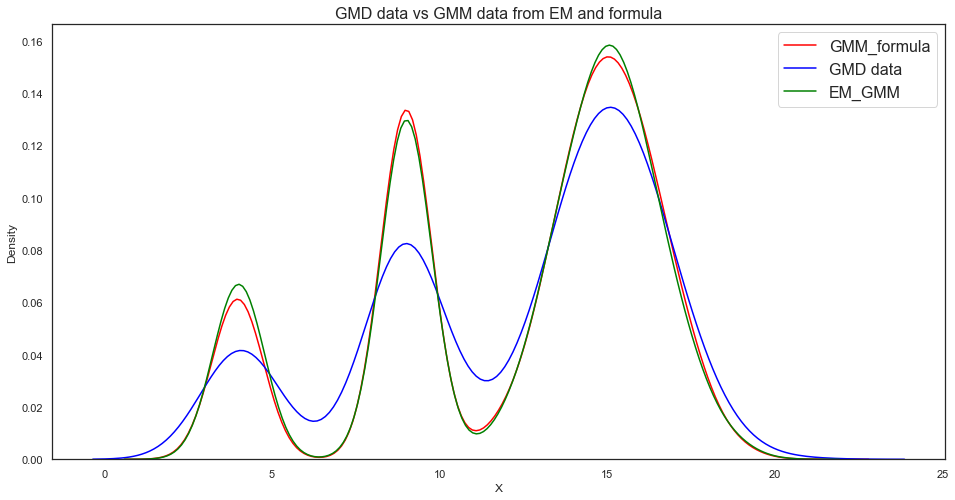

In [129]:
# generate gmm with formula

weights = [0.12,0.25,0.63]
means = [4,9,15.09]
sigmas = [0.5,0.5,1.5]

g1 = stats.norm(loc=means[0], scale=sigmas[0]).rvs(size=10000)
g2 = stats.norm(loc=means[1], scale=sigmas[1]).rvs(size=10000)
g3 = stats.norm(loc=means[2], scale=sigmas[2]).rvs(size=10000)

gaussians = [g1, g2, g3]

gmm = np.empty(shape=(20000,1))

for i in range(20000):
    gaus_indx = random.choices([0,1,2], weights=weights)[0]
    gmm[i] = np.random.choice(a=gaussians[gaus_indx], size=1)

# generate gmm with EM

em_gmm = np.empty(shape=(20000,1))

gaussians_em = []

for i in range(k):
    gaussians_em.append(stats.norm(loc=parameters['means'][i], scale=parameters['sigmas'][i]).rvs(size=10000))

for i in range(20000):
    gaus_indx = random.choices([0,1,2], weights=parameters['weights'])[0]
    em_gmm[i] = np.random.choice(a=gaussians_em[gaus_indx], size=1)
    
fig = plt.figure(figsize=(16,8))
plt.subplot()
sns.distplot(gmm, color='red', label='GMM_formula', hist=False)
sns.distplot(gmd['X'], color='blue', label='GMD data', hist=False)
sns.distplot(em_gmm, color='green', label='EM_GMM', hist=False)
plt.legend(fontsize='16')
plt.title('GMD data vs GMM data from EM and formula', fontsize='16');

#### 3.C
Now assume that the data comes from a Gaussian mixture distribution (GMD) with $k=4$.

The given data and parameters stay the same.

Can you estimate the unknown parameters in the two ways described in section A? Explain.

### Answer

We can't use the formulas because we now have 6 parameters missing (adittional 3:$w_4,\mu_4,\sigma_4$), with only 3 equations.

We can use the EM function with a bit of revisions to the update_param and em methods, so it will use 4 parameters vectors instead of 3.

In [130]:
def update_param_new(k, series, respons, weights, means, sigmas):
    
    # calculate weights
    new_w = weights
    w1 = respons[:,0].sum() / series.size
    w3 = respons[:,2].sum() / series.size
    w4 = respons[:,3].sum() / series.size
    
    # normalize calculated weights 1,3,4 to be sum less than 1
    new_w[0] = w1 * 0.75 / (w1 + w3 + w4)
    new_w[2] = w3 * 0.75 / (w1 + w3 + w4)
    new_w[3] = w4 * 0.75 / (w1 + w3 + w4)
        
    # calculate means
    new_m = means
    new_m[2] = (respons[:,2] * series).sum() / (new_w[2] * series.size)
    new_m[3] = (respons[:,3] * series).sum() / (new_w[3] * series.size)
    
    # calculate sigmas
    new_s = sigmas
    new_s[3] = np.sqrt((respons[:,3] * (series - new_m[3])**2).sum(axis=0) / (new_w[3] * series.size))
    
#     print(f'weights: {new_w}')
#     print(f'means: {new_m}')
#     print(f'sigmas: {sigmas}')
    
    return new_w, new_m, new_s

def em(k, series, weights, means, sigmas, max_iter=100, tol=0.05):
    
    likelihood = log_likelihood(series, weights, means, sigmas, k)
    LL_diff = 1
    itr = 0
    while LL_diff > tol and itr < max_iter:
#         print(f'iteration: {itr}')
        responsibilities = calc_responsibilities(k, series, weights, means, sigmas)
        
        weights, means, sigmas = update_param_new(k, series, responsibilities, weights, means, sigmas)
        
        itr += 1
        
        new_liklihood = log_likelihood(series, weights, means, sigmas, k)
        
        LL_diff = abs(likelihood - new_liklihood)
        
        likelihood = new_liklihood
    
    theta = {'k':k, 'weights':weights, 'means':means, 'sigmas':sigmas,'logL':likelihood}
        
    return theta, itr

In [131]:
X = gmd['X']
init_weights = [0.1, 0.25, 0.6, 0.05]
init_means = [4, 9, 12, 1]
init_sigmas = [0.5, 0.5, 1.5, 1]
k = 4

new_parameters, itr = em(k, X, init_weights, init_means, init_sigmas, max_iter=500, tol=0.00001)

print(new_parameters)
print(f'iterations: {itr}')

{'k': 4, 'weights': [0.11469972016934607, 0.25, 0.6250297429406075, 0.010270536890046573], 'means': [4, 9, 15.104733531057686, 4.085799489027169], 'sigmas': [0.5, 0.5, 1.5, 0.017330532240020294], 'logL': 95.72402644318068}
iterations: 107


In [132]:
print("The parameters of the GMM are:")
print(f"\nmu1= {new_parameters['means'][0]:.2f}")
print(f"\nmu2= {new_parameters['means'][1]:.2f}")
print(f"\nmu3= {new_parameters['means'][2]:.2f}")
print(f"\nmu4= {new_parameters['means'][3]:.2f}")
      
print(f"\nsig1= {new_parameters['sigmas'][0]:.2f}")
print(f"\nsig2= {new_parameters['sigmas'][1]:.2f}")
print(f"\nsig3= {new_parameters['sigmas'][2]:.2f}")
print(f"\nsig4= {new_parameters['sigmas'][3]:.2f}")
      
print(f"\nw1= {new_parameters['weights'][0]:.2f}")
print(f"\nw2= {new_parameters['weights'][1]:.2f}")
print(f"\nw3= {new_parameters['weights'][2]:.2f}")
print(f"\nw4= {new_parameters['weights'][3]:.2f}")

The parameters of the GMM are:

mu1= 4.00

mu2= 9.00

mu3= 15.10

mu4= 4.09

sig1= 0.50

sig2= 0.50

sig3= 1.50

sig4= 0.02

w1= 0.11

w2= 0.25

w3= 0.63

w4= 0.01


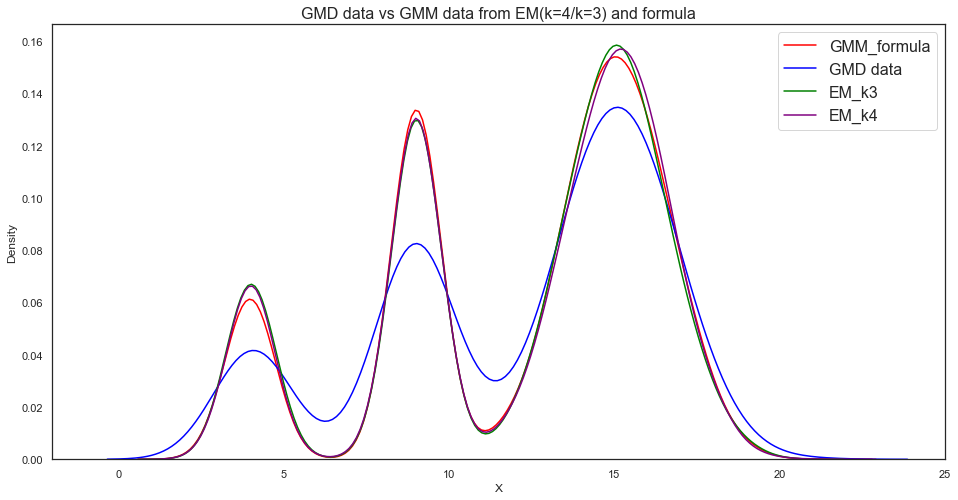

In [133]:
# generate gmm with EM, k=4
em4_gmm = np.empty(shape=(20000,1))

gaussians_em4 = []

for i in range(4):
    gaussians_em4.append(stats.norm(loc=new_parameters['means'][i], scale=new_parameters['sigmas'][i]).rvs(size=10000))

for i in range(20000):
    gaus_indx = random.choices([0,1,2,3], weights=new_parameters['weights'])[0]
    em4_gmm[i] = np.random.choice(a=gaussians_em4[gaus_indx], size=1)

# plot all the graphs
fig = plt.figure(figsize=(16,8))
plt.subplot()
sns.distplot(gmm, color='red', label='GMM_formula', hist=False)
sns.distplot(gmd['X'], color='blue', label='GMD data', hist=False)
sns.distplot(em_gmm, color='green', label='EM_k3', hist=False)
sns.distplot(em4_gmm, color='purple', label='EM_k4', hist=False)
plt.legend(fontsize='16')
plt.title('GMD data vs GMM data from EM(k=4/k=3) and formula', fontsize='16')
plt.xlim([-2,25]);

#### 3.D
Describe two ways for generating data for a GMM random variable with:
* centers at  $\mu_1=3, \mu_2=7, \mu_3=10$
* $\sigma_1=\sigma_2=\sigma_3=1$
* $w_1=w_2=w_3=0.33$

### Answer
1. First way: sampling each gaussian according to its distribution and weight. Repeat for each data point for the new GMM (see also the above GMMs i generated)
2. Second way: sum along small intervals, according to the CDF of the function

#### 3.E
Use one of the above approaches to generate 1000 points and plot a histogram of the result (decide on bins, axes etc)


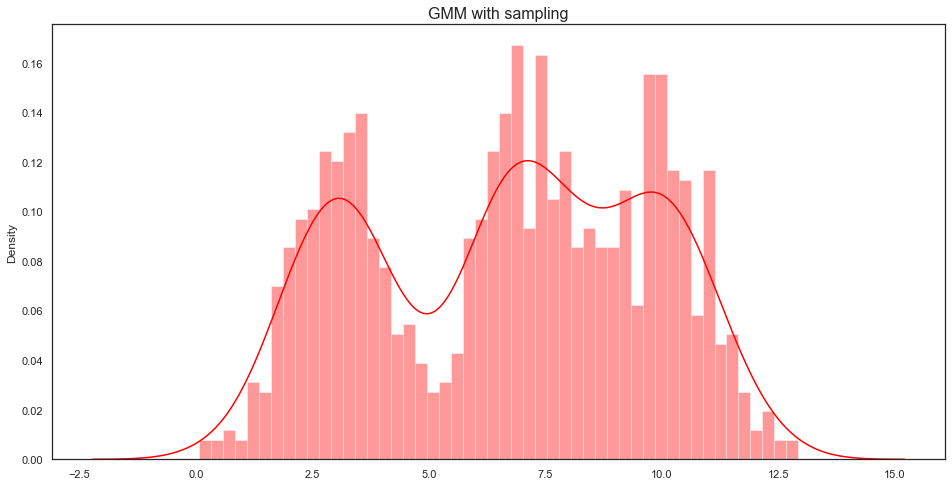

In [70]:
# Sampling

gmm = np.empty(shape=(1000,1))

gaussians = []

means = [3, 7, 10]
sigmas = [1, 1, 1]
weights = [1/3, 1/3, 1/3]

for i in range(3):
    gaussians.append(stats.norm(loc=means[i], scale=sigmas[i]).rvs(size=10000))

for i in range(1000):
    gaus_indx = random.choices([0,1,2], weights=weights)[0]
    gmm[i] = np.random.choice(a=gaussians[gaus_indx], size=1)

# plot all the graphs
fig = plt.figure(figsize=(16,8))
plt.subplot()
sns.distplot(gmm, color='red', label='GMM', hist=True, bins=50)
plt.title('GMM with sampling', fontsize='16');

#### 3.F
Use the other one to generate 1000 more points and draw two comparative histograms.

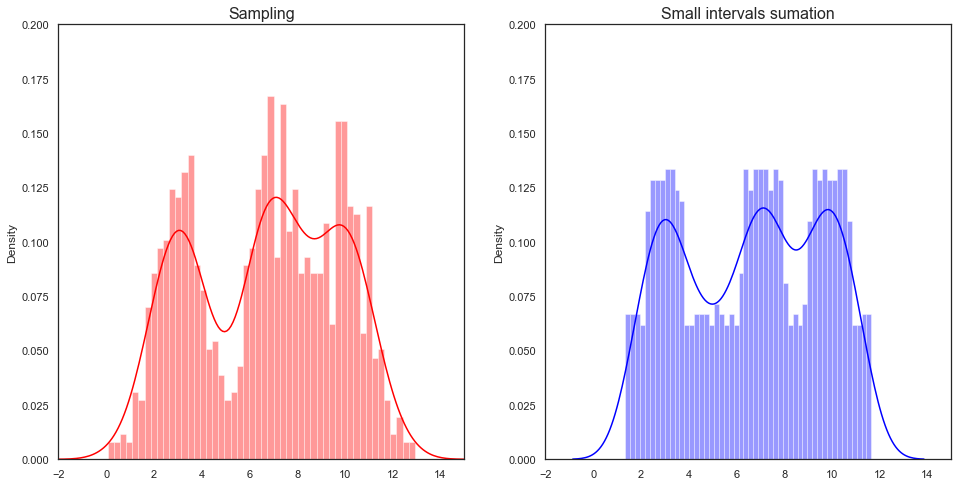

In [71]:
# plot the function

# calculate PDF
def gaus_pdf(x, m, s):
    return stats.norm.pdf(x, loc=m, scale=s)

# calculate integral of xf(x) dx
def xfx(x, weights, means, sigmas):
    
    f = []
    
    for i in range(len(weights)):
        f.append(weights[i] * gaus_pdf(x, means[i], sigmas[i]) * x)
    
    return sum(f)


means = [3, 7, 10]
sigmas = [1, 1, 1]
weights = [1/3, 1/3, 1/3]

# generate x
x = np.linspace(min(means) - 4*max(sigmas),max(means) + 4*max(sigmas),1000)

## the function f(x)
# y = 1/3*(gaus_pdf(x,3,1) + gaus_pdf(x,7,1) + gaus_pdf(x,10,1))

data = np.array([])

for i in range(len(x)-1):
    dx = x[i+1] - x[i]
    data = np.append(data, xfx(dx, weights, means, sigmas))


def cdf_sum(x):
    f = []
    for i in range(len(weights)):
        f.append(weights[i] * stats.norm.cdf(x, means[i], sigmas[i]))
    return sum(f)

new_xx = np.array([])

#insert random data to each (x[i],x[i+1]) according to it's density
for i in range(len(x)-2):
    new_xx = np.append(new_xx,np.random.uniform(x[i],x[i+1],int(round((cdf_sum(x[i+1])-cdf_sum(x[i]))*1000,0))))


fig, axes = plt.subplots(1, 2, figsize=(16,8))

plt.subplot(121)
sns.distplot(gmm, bins=50, color='red')
plt.title('Sampling', fontsize=16)
plt.xlim([-2,15])
plt.ylim([0,0.2])

plt.subplot(122)
sns.distplot(new_xx, bins=50, color='blue')
plt.title('Small intervals sumation', fontsize=16)
plt.xlim([-2,15])
plt.ylim([0,0.2]);

### Question 4 - Normally distributed salaries

The annual salaries of employees in a large Randomistan company are approximateley normally distributed with a mean of 75,000 RCU and a standard deviation of 37,500 RCU.

In [72]:
mu = 75000
sd = 37500

salaries = stats.norm(loc=mu, scale=sd)

#### 4.A
What percent of people earn less than 50,000 RCU?

In [73]:
print('{:.2f}% of the people earn less than 50,000 RCU'.format(salaries.cdf(50000)*100))


25.25% of the people earn less than 50,000 RCU


#### 4.B
What percent of people earn between 45,000 RCU and 65,000 RCU?

In [74]:
print('{:.2f}% of people earn between 45,000 RCU and 65,000 RCU'.format(salaries.cdf(65000)*100-salaries.cdf(45000)*100))


18.30% of people earn between 45,000 RCU and 65,000 RCU


#### 4.C
What percent of people earn more than 85,000 RCU?

In [75]:
print('{:.2f}% of people earn more than 85,000 RCU'.format(salaries.sf(85000)*100))


39.49% of people earn more than 85,000 RCU


#### 4.D
The company has 1000 employees. How many employees in the company do you expect to earn more than 140,000 RCU?

In [76]:
import math
print('I expect that {} employees earn more than 140,000 RCU'.format(math.floor(salaries.sf(140000)*1000)))


I expect that 41 employees earn more than 140,000 RCU


### Question 5 - Coupon collector

Let $T_{N}$ denote the waiting time for full single coupon collection with N different equiprobable coupon types

#### 5.A
Write code to compute the exact value of $E(T_{N})$

In [77]:
def single_coupon_probs(n):
    return [(n - i) / float(n) for i in range(n)]

def single_coupon_mean(n):
    return sum([1.0 / p for p in single_coupon_probs(n)])

In [78]:
single_coupon_mean(30)

119.84961392761173

#### 5.B
Write code to compute the exact value of $V(T_{N})$

In [79]:
def single_coupon_var(n):
    return sum([(1.0 - p) / (p**2) for p in single_coupon_probs(n)])

In [80]:
single_coupon_var(30)

1331.085491913826

#### 5.C
Write code to exactly compute $P(T_{30}>60)$

In [81]:
def k_coupon_probs(n, k):
    '''
    n = number of coupons in total
    k = number of trails
    return all the probabilities of all the coupons you can pick in k trails
    the function builds a matrix of the steps of the coupon collector
    the previous cell can either be a success or a failure
    '''
    p = np.zeros((n+1, k+1))
    
    p[0,0] = 1
    
    for i in range(1, n+1):
        
        for j in range(i, k+1):
            
            p[i,j] = p[i,j-1]*i/n + p[i-1,j-1]*(n-i+1)/n
    
    return p

def coupon_cdf(m, n, k):
    '''return the probability to pick m coupons, from n coupons in k trails'''
    return np.sum(k_coupon_probs(n,k)[:m,k])

print(f"The probability to select 30 different coupons, from 30 in total, in more than 60 trails is:{coupon_cdf(30,30 , 60):.3f}")


The probability to select 30 different coupons, from 30 in total, in more than 60 trails is:0.994


#### 5.D
Let $S_N$ denote the waiting time until $N/2$ different coupons are collected.

Write code to exactly compute $P(S_{30}>60)$

In [82]:
print(f"The probability to select 15 different coupons, from 30 in total, in more than 60 trails is:{coupon_cdf(15, 30 , 60)}")


The probability to select 15 different coupons, from 30 in total, in more than 60 trails is:1.7143091976501995e-12
